## Information about Dataset

## Introduction

In this activity, we will use `input validation` and `label encoding` to prepare a dataset for analysis. These are fundamental techniques used in all types of data analysis, from simple linear regression to complex neural networks. 

In this activity, we want to develop a better understanding of unicorns, with the hope to seize the opportunities in future highly successful companies. Therefore, we are focused on the investment strategies of the three top unicorn investors: **Sequoia Capital**, **Tiger Global Management**, and **Accel**. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
companies = pd.read_csv("/Users/lexicai/Downloads/archive/Unicorn_Companies.csv")

In [3]:
companies.dtypes

Company             object
Valuation           object
Date Joined         object
Industry            object
City                object
Country             object
Continent           object
Year Founded         int64
Funding             object
Select Investors    object
dtype: object

### Correct the data types

In [4]:
# Convert 'Date Joined' to datetime

companies['Date Joined'] = pd.to_datetime(companies['Date Joined'])

In [6]:
# Create a new column to find out how long will it take to be a unicorn

companies['Years To Unicorn'] = companies['Date Joined'].dt.year - companies['Year Founded']
companies.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Years To Unicorn
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",5
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",10
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",4
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",6


In [7]:
companies[companies['Years To Unicorn'] < 0]['Company'].values

array(['Yidian Zixun'], dtype=object)

In [8]:
companies[companies['Years To Unicorn'] < 0]['Company'].index

Int64Index([714], dtype='int64')

In [10]:
companies[companies['Years To Unicorn'] < 0]['Company']

714    Yidian Zixun
Name: Company, dtype: object

In [9]:
companies.loc[companies['Company'] == 'InVision']

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Years To Unicorn
528,InVision,$2B,2017-11-01,Internet software & services,New York,United States,North America,2011,$349M,"FirstMark Capital, Tiger Global Management, IC...",6


In [11]:
# Identify and correct the issue with 'Years To Unicorn'.

print('Companies with a negative Years To Unicorn (before cleaning):')

# Determine which companies have a negative years to unicorn
print(companies[companies['Years To Unicorn'] < 0]['Company'].values)

# Replacing the Year Founded for InVision with 2012 (which was determined from an internet search)
companies.loc[companies['Company'] == 'InVision', 'Year Founded'] = 2012

# Recalculating the Years to Unicorn column (to correct Invision's value)
companies['Years To Unicorn'] = companies['Date Joined'].dt.year - companies['Year Founded']

# Calculate which companies have a negative years to unicorn to ensure data was properly cleaned
print('Companies with a negative Years To Unicorn (after cleaning):')
print(companies[companies['Years To Unicorn'] < 0]['Company'].values)

Companies with a negative Years To Unicorn (before cleaning):
['Yidian Zixun']
Companies with a negative Years To Unicorn (after cleaning):
['Yidian Zixun']


In [12]:
companies.loc[companies["Company"]=="InVision"]

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Years To Unicorn
528,InVision,$2B,2017-11-01,Internet software & services,New York,United States,North America,2012,$349M,"FirstMark Capital, Tiger Global Management, IC...",5


**QUESTION: Why are we interested in how quickly a company achieved unicorn status?**

Learning how quickly a company achieves unicorn status may reveal certain trends or commonalities. We could leverage this information to find future companies to invest in.

### Input validation

The data has some issues with bad data, duplicate rows, and inconsistent `Industry` labels.

Identify and correct each of these issues.

In [13]:
print(companies['Industry'].nunique())

# Define a dictionary that maps the incorrect industry spellings to their correct industry spelling
industry_dct = {'Artificial Intelligence':'Artificial intelligence',
                'Data management and analytics':'Data management & analytics',
                'FinTech':'Fintech'}

# Rename the misspelled industry labels according to the dictionary defined above
companies['Industry'] = companies['Industry'].replace(industry_dct)

# Print the number of unique industries to validate only 15 are present
print(companies['Industry'].nunique())

16
15


The business mentioned that no `Company` should appear in the data more than once. Verify that this is true, and, if not, clean the data so each `Company` appears only once.

In [14]:
# Check and remove duplicate Company values in companies.

# Calculate the number of duplicated companies before cleaning
print('Number of duplicated companies (before cleaning):')
print(companies['Company'].duplicated().sum())

# Remove duplicate rows in the Company column
companies.drop_duplicates(subset=['Company'], inplace = True)

# Calculate the number of duplicated companies after cleaning
print('')
print('Number of duplicated companies (after cleaning):')
print(companies['Company'].duplicated().sum())

Number of duplicated companies (before cleaning):
1

Number of duplicated companies (after cleaning):
0


**Question: What steps did you take to perform input validation for this dataset?**

 The input validation steps for this lab included:
 
 * Fixing incorrect values
 * Correcting inconsistencies in the data
 * Removing duplicate data

### Change categorical data to numerical data

Two common methods for changing categorical data to numerical are creating dummy variables and label encoding. There is no best method, as the decision on which method to use depends on the context and must be made on a case-to-case basis.

Apply the appropriate methods for converting the following variables to numeric: `Valuation`,  `Continent`, `Country/Region`, and `Industry`.

Create a 'simplified' representation of `Valuation` with two categories: one that denotes if the `Valuation` was in the top 50% of valuations in the data and one if it was not.

In [15]:
# Convert Valuation to numeric.
companies['Valuation'] = companies['Valuation'].str.strip("$B").astype(int)

# Use qcut to divide Valuation into 'high' and 'low' Valuation groups
companies['High Valuation'] = pd.qcut(companies['Valuation'], 2, labels = ['No','Yes'])

# Convert High Valuation to numeric
companies['High Valuation'] = companies['High Valuation'].cat.codes

In [16]:
companies.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Years To Unicorn,High Valuation
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",5,1
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10,1
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",10,1
3,Stripe,95,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",4,1
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",6,1


In [18]:
# Companies with low valuation

companies[companies["High Valuation"] == 0].head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Years To Unicorn,High Valuation
355,1047 Games,2,2021-09-14,Internet software & services,Zephyr Cove,United States,North America,2017,$127M,"VGames, Lakestar, Galaxy Interactive",4,0
356,Baiwang,2,2019-03-25,Fintech,Beijing,China,Asia,2015,$224M,"Guozhong Venture Capital Management, Shenzhen ...",4,0
357,Boba,2,2022-04-05,Fintech,San Francisco,United States,North America,2018,$45M,"DeFi Technologies, Hypersphere Ventures, M13",4,0
358,Bought By Many,2,2021-06-01,Fintech,London,United Kingdom,Europe,2012,$477M,"Octopus Ventures, Munich Re Ventures, CommerzV...",9,0
359,Cambridge Mobile Telematics,2,2018-12-19,Mobile & telecommunications,Cambridge,United States,North America,2010,$503M,SoftBank Group,8,0


### Convert `Continent` to numeric

In [19]:
# Convert Continent to numeric data.

# Create dummy variables with Continent values
continents_encoded = pd.get_dummies(companies['Continent'], drop_first = True)
# drop_first=True: remove the first column

# Add DataFrame with dummy Continent labels back to companies data.
companies = pd.concat([companies, continents_encoded], axis=1)

In [20]:
companies.head()
# 1 represents presence, 0 represents abscence

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Years To Unicorn,High Valuation,Asia,Europe,North America,Oceania,South America
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",5,1,1,0,0,0,0
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10,1,0,0,1,0,0
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",10,1,1,0,0,0,0
3,Stripe,95,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",4,1,0,0,1,0,0
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",6,1,0,1,0,0,0


### Convert `Country` to numeric

In [21]:
# Convert Country/Region to numeric data.

# Create numeric categoriews for Country/Region
companies['Country'] = companies['Country'].astype('category').cat.codes
companies.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Years To Unicorn,High Valuation,Asia,Europe,North America,Oceania,South America
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,9,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",5,1,1,0,0,0,0
1,SpaceX,100,2012-12-01,Other,Hawthorne,44,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10,1,0,0,1,0,0
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,9,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",10,1,1,0,0,0,0
3,Stripe,95,2014-01-23,Fintech,San Francisco,44,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",4,1,0,0,1,0,0
4,Klarna,46,2011-12-12,Fintech,Stockholm,38,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",6,1,0,1,0,0,0


### Convert `Industry` to numeric

In [25]:
# Convert Industry to numeric data.

# Create dummy variables with Industry values
industry_encoded = pd.get_dummies(companies['Industry'], drop_first = True)

# Add DataFrame with dummy Industry labels back to companies data.
companies = pd.concat([companies, industry_encoded], axis=1)
industry_encoded.head()

,Auto & transportation,Consumer & retail,Cybersecurity,Data management & analytics,E-commerce & direct-to-consumer,Edtech,Fintech,Hardware,Health,Internet software & services,Mobile & telecommunications,Other,"Supply chain, logistics, & delivery",Travel
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0


**Question: Which categorical encoding approach did you use for each variable? Why?**

* `Valuation` - Label encoding was used because the labels are ordered.
* `Continent` - One hot encoding was used because there are few labels and they are not ordered.
* `Country/Region` - Label encoding was used because there are many labels, although they are not ordered.
* `Industry` - One hot encoding was used because there are few labels and they are not ordered.

### Convert the top three unicorn investors to numeric

Create three dummy variables (one for each investor) that denotes if the following investors are included as `Select Investors`: Sequoia Capital, Tiger Global Management, and Accel.

For the purpose of this lab, these investors are called the 'Big 3' unicorn investment groups.

In [26]:
# Create a dummy variable that denotes if Sequoia Capital is a Select Investor.

companies['Sequoia Capital'] = companies['Select Investors'].str.contains('Sequoia Capital')
# The result is a boolean Series where True indicates that 'Sequotia Capital'
companies['Sequoia Capital'] = companies['Sequoia Capital'].astype(bool).astype(int)
companies['Sequoia Capital'].head()
# 1 represets True value: 'Sequotia Capital'

0    1
1    0
2    1
3    0
4    1
Name: Sequoia Capital, dtype: int64

In [27]:
# Create a dummy variable that denotes if Tiger Global Management is a Select Investor.

companies['Tiger Global Management'] = companies['Select Investors'].str.contains('Tiger Global Management')
companies['Tiger Global Management'] = companies['Tiger Global Management'].astype(bool).astype(int)
companies['Tiger Global Management'].head()

0    0
1    0
2    1
3    0
4    0
Name: Tiger Global Management, dtype: int64

In [28]:
# Create a dummy variable that denotes if Accel is a Select Investor.

companies['Accel'] = companies['Select Investors'].str.contains('Accel')
companies['Accel'] = companies['Accel'].astype(bool).astype(int)

**Question: How does label encoding change the data?**

Label encoding changes the data by assigning each category a unique number instead of a qualitative value. 

**Question: What are the benefits of label encoding?**

Label encoding is effective when there are a large number of categorical variables and when the variables have a particular order. It is useful in machine learning models, such as decision trees and random forests.

**Question: What are the disadvantages of label encoding?**

Label encoding may make it more difficult to directly interpet what a column value represents. Further, it may introduce an unintended relationship between the categorical data in a dataset.

## Step 3: Model building

Create three bar plots to visualize the distribution of investments by industry for the following unicorn investors: Sequoia Capital, Tiger Global Management, and Accel.

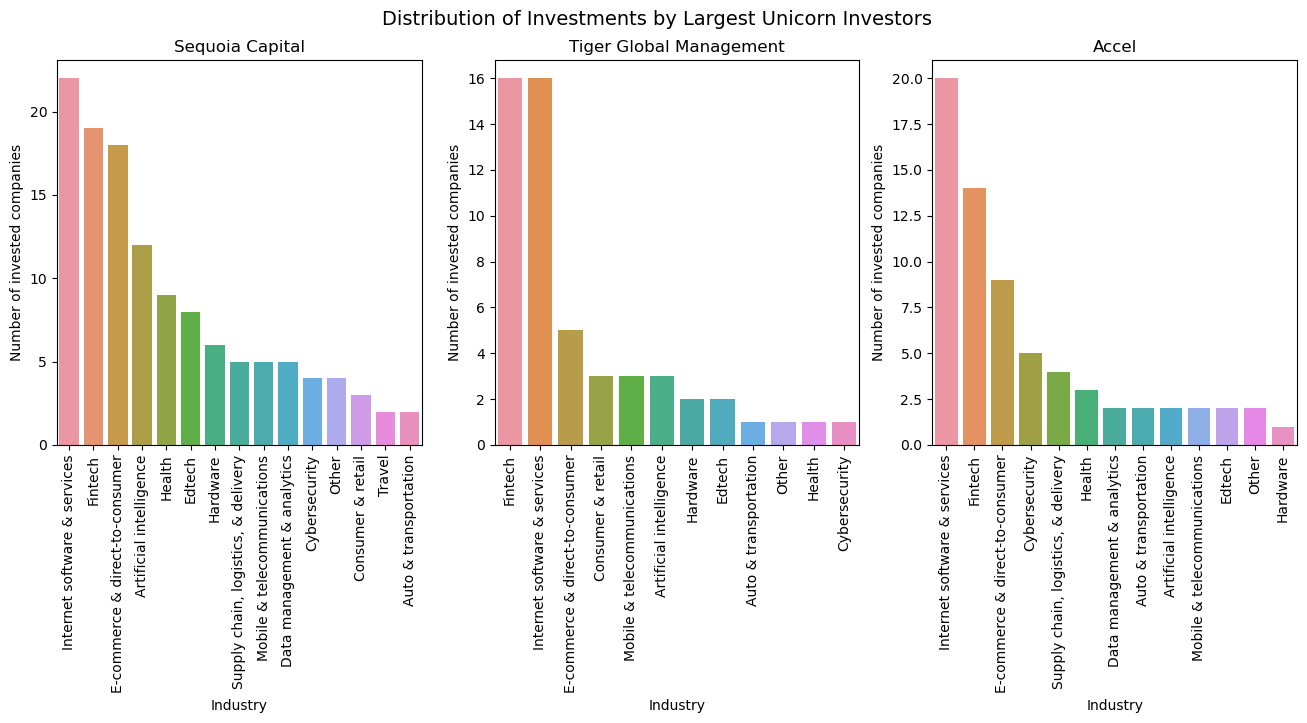

In [29]:
# Create 3 bar plots for the distribution of investments by industry for each top unicorn investors.

# Create a 1x3 plot figure
fig, axes = plt.subplots(1, 3, figsize = (16,5))
# 1: row, 3: column

# Setting a variable to count which axis the plot should go on
idx = 0 # keep track of the current index

# Loop through a list of the three top unicorn investors
for c in ['Sequoia Capital', 'Tiger Global Management','Accel']:
    
    # Compute the number of companies invested in in each industry by c
    companies_sample = companies[companies[c] == 1]
    # companies_sample only contains the above three investors
    
    # Calculate the distribution of Industry
    companies_sample = companies_sample['Industry'].value_counts()

    # Create a bar plot
    sns.barplot(
        x=companies_sample.index, 
        y=companies_sample.values, 
        ax=axes[idx])

    # Set title
    axes[idx].set_title(c)

    # Set x-axis label
    axes[idx].set_xlabel("Industry")

    # Set y-axis label
    axes[idx].set_ylabel("Number of invested companies")

    # Rotate labels on the x-axis
    axes[idx].set_xticklabels(companies_sample.index, rotation=90);

    # Add 1 to idx so on the next loop it changes to the next plot
    idx +=1

# Set the title of the whole plot
plt.suptitle('Distribution of Investments by Largest Unicorn Investors', fontsize = 14);

**Question: What do you notice about the industries invested in by each top unicorn investor?**

The three industries most commonly invested in by the top unicorn investors are: `internet software and services`, `fintech`, and `e-commerce and direct-to-consumer`.

Other insights include:
* Sequoia Capital is the only top unicorn investor to invest in travel unicorns.
* Tiger Global Management is the only top unicorn investor to not invest in supply chain and logistics.
* Accel has invested in more cybersecurity unicorns than Sequoia Capital and Tiger Global Management.

### Continents 

Create a visualization that shows the continents of the unicorns invested in by the top three unicorn investors.

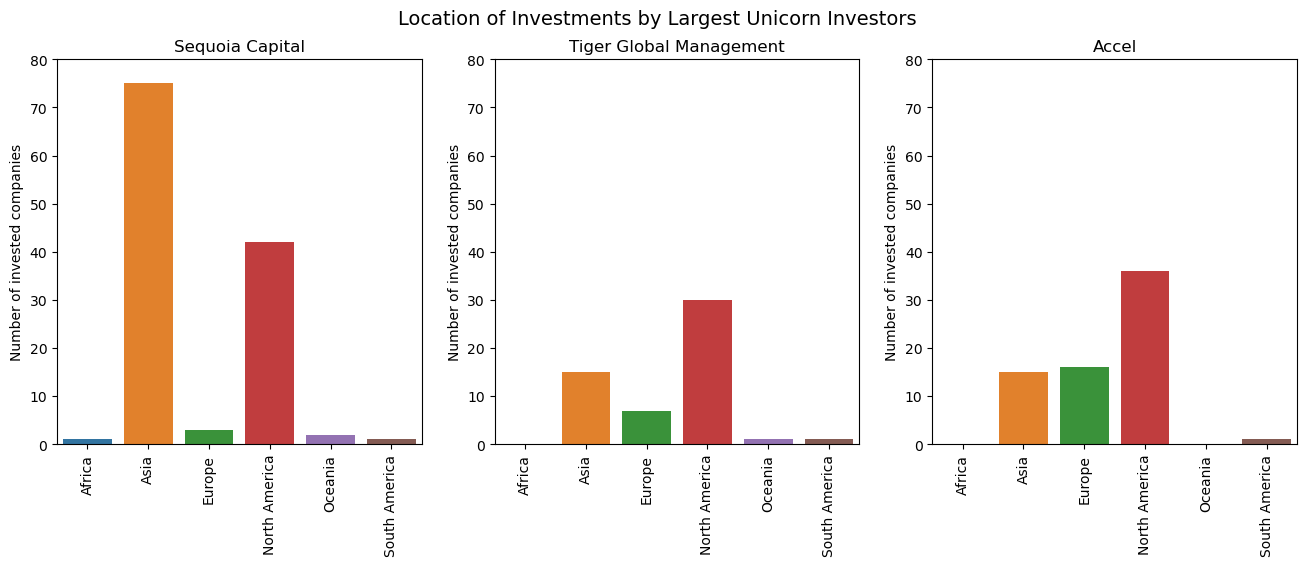

In [30]:
# Visualize the continents invested in by the top three unicorn investors.

# Create a 1x3 plot figure
fig, axes = plt.subplots(1, 3, figsize = (16,5))

# Setting a variable to count which axis the plot should go on
idx = 0

# Loop through a list of the three top unicorn investors
for c in ['Sequoia Capital', 'Tiger Global Management', 'Accel']:
    
    # Compute the number of companies invested in in each industry by c
    companies_sample = companies[companies[c] == 1]
    
    # Calculate the distribution of Continent
    companies_sample = companies_sample['Continent'].value_counts()
    
    # Add Oceania as index with value 0 if not present in companies_sample
    if 'Oceania' not in companies_sample.index:
        companies_sample['Oceania'] = 0
        
    # Add Africa as index with value 0 if not present companies_sample
    if 'Africa' not in companies_sample.index:
        companies_sample['Africa'] = 0
        
    # Sort the index so the x axis for all plot is in alphabetical order
    companies_sample = companies_sample.sort_index()
    
    # Create a bar plot
    sns.barplot(
        x=companies_sample.index, 
        y=companies_sample.values, 
        ax=axes[idx])

    # Set title
    axes[idx].set_title(c)

    # Set y range so all plots have same range
    axes[idx].set(ylim=(0, 80))

    # Set y-axis label
    axes[idx].set_ylabel("Number of invested companies")

    # Rotate labels on the x-axis
    axes[idx].set_xticklabels(companies_sample.index, rotation=90);

    # Add 1 to idx so on the next loop it changes ot the next plot
    idx +=1

# Set the title of the whole plot
plt.suptitle('Location of Investments by Largest Unicorn Investors', fontsize = 14);